In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
from scipy.stats import shapiro, wilcoxon

In [124]:
# Marital Status
marital_status_dict = {
    1: "Single",
    2: "Married",
    3: "Widower",
    4: "Divorced",
    5: "Facto Union",
    6: "Legally Separated"
}

# Application Mode
application_mode_dict = {
    1: "1st phase - General Contingent",
    2: "Ordinance No. 612/93",
    5: "1st phase - Special Contingent (Azores Island)",
    7: "Holders of Other Higher Courses",
    10: "Ordinance No. 854-B/99",
    15: "International Student (Bachelor)",
    16: "1st phase - Special Contingent (Madeira Island)",
    17: "2nd phase - General Contingent",
    18: "3rd phase - General Contingent",
    26: "Ordinance No. 533-A/99, item b2) (Different Plan)",
    27: "Ordinance No. 533-A/99, item b3 (Other Institution)",
    39: "Over 23 Years Old",
    42: "Transfer",
    43: "Change of Course",
    44: "Technological Specialization Diploma Holders",
    51: "Change of Institution/Course",
    53: "Short Cycle Diploma Holders",
    57: "Change of Institution/Course (International)"
}

# Daytime/Evening Attendance
attendance_dict = {
    1: "Daytime",
    0: "Evening"
}

# Previous Qualification
previous_qualification_dict = {
    1: "Secondary Education",
    2: "Higher Education - Bachelor's Degree",
    3: "Higher Education - Degree",
    4: "Higher Education - Master's",
    5: "Higher Education - Doctorate",
    6: "Frequency of Higher Education",
    9: "12th Year of Schooling - Not Completed",
    10: "11th Year of Schooling - Not Completed",
    12: "Other - 11th Year of Schooling",
    14: "10th Year of Schooling",
    15: "10th Year of Schooling - Not Completed",
    19: "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.",
    38: "Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.",
    39: "Technological Specialization Course",
    40: "Higher Education - Degree (1st Cycle)",
    42: "Professional Higher Technical Course",
    43: "Higher Education - Master (2nd Cycle)"
}

course = {
    33: "Biofuel Production Technologies",
    171: "Animation and Multimedia Design",
    8014: "Social Service (evening attendance)",
    9003: "Agronomy",
    9070: "Communication Design",
    9085: "Veterinary Nursing",
    9119: "Informatics Engineering",
    9130: "Equinculture",
    9147: "Management",
    9238: "Social Service",
    9254: "Tourism",
    9500: "Nursing",
    9556: "Oral Hygiene",
    9670: "Advertising and Marketing Management",
    9773: "Journalism and Communication",
    9853: "Basic Education",
    9991: "Management (evening attendance)"
}

# Nationality
nationality_dict = {
    1: "Portuguese",
    2: "German",
    6: "Spanish",
    11: "Italian",
    13: "Dutch",
    14: "English",
    17: "Lithuanian",
    21: "Angolan",
    22: "Cape Verdean",
    24: "Guinean",
    25: "Mozambican",
    26: "Santomean",
    32: "Turkish",
    41: "Brazilian",
    62: "Romanian",
    100: "Moldova (Republic of)",
    101: "Mexican",
    103: "Ukrainian",
    105: "Russian",
    108: "Cuban",
    109: "Colombian"
}

# Mother's Qualification (same structure as Father's Qualification)
mother_qualification_dict = {
    1: "Secondary Education - 12th Year of Schooling or Eq.",
    2: "Higher Education - Bachelor's Degree",
    3: "Higher Education - Degree",
    4: "Higher Education - Master's",
    5: "Higher Education - Doctorate",
    6: "Frequency of Higher Education",
    9: "12th Year of Schooling - Not Completed",
    10: "11th Year of Schooling - Not Completed",
    11: "7th Year (Old)",
    12: "Other - 11th Year of Schooling",
    14: "10th Year of Schooling",
    18: "General Commerce Course",
    19: "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.",
    22: "Technical-Professional Course",
    26: "7th Year of Schooling",
    27: "2nd Cycle of the General High School Course",
    29: "9th Year of Schooling - Not Completed",
    30: "8th Year of Schooling",
    34: "Unknown",
    35: "Can't Read or Write",
    36: "Can Read Without Having a 4th Year of Schooling",
    37: "Basic Education 1st Cycle (4th/5th Year) or Equiv.",
    38: "Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.",
    39: "Technological Specialization Course",
    40: "Higher Education - Degree (1st Cycle)",
    41: "Specialized Higher Studies Course",
    42: "Professional Higher Technical Course",
    43: "Higher Education - Master (2nd Cycle)",
    44: "Higher Education - Doctorate (3rd Cycle)"
}

# Father's Qualification (same structure as Mother's Qualification)
father_qualification_dict = mother_qualification_dict.copy()

# Mother's Occupation
mother_occupation_dict = {
    0: "Student",
    1: "Legislative & Executive Representatives, Directors, Managers",
    2: "Intellectual & Scientific Professionals",
    3: "Intermediate Level Technicians & Professions",
    4: "Administrative Staff",
    5: "Personal Services, Security, Safety Workers & Sellers",
    6: "Farmers & Skilled Workers in Agriculture, Fisheries & Forestry",
    7: "Skilled Industry, Construction & Craft Workers",
    8: "Machine Operators & Assembly Workers",
    9: "Unskilled Workers",
    10: "Armed Forces Professions",
    90: "Other Situation",
    99: "Blank",
    122: "Health Professionals",
    123: "Teachers",
    125: "ICT Specialists",
    131: "Science & Engineering Technicians",
    132: "Health Technicians",
    134: "Legal, Social, Cultural & Sports Technicians",
    141: "Office Workers & Secretaries",
    143: "Accounting & Financial Services Staff",
    144: "Other Administrative Support Staff",
    151: "Personal Service Workers",
    152: "Sellers",
    153: "Personal Care Workers",
    171: "Skilled Construction Workers",
    173: "Jewelers, Artisans & Craft Workers",
    175: "Food, Clothing & Woodworking Industry Workers",
    191: "Cleaning Workers",
    192: "Unskilled Agriculture & Fisheries Workers",
    193: "Unskilled Industry & Transport Workers",
    194: "Meal Preparation Assistants"
}

# Father's Occupation (same structure as Mother's Occupation with additional categories)
father_occupation_dict = mother_occupation_dict.copy()
father_occupation_dict.update({
    101: "Armed Forces Officers",
    102: "Armed Forces Sergeants",
    103: "Other Armed Forces Personnel",
    112: "Administrative & Commercial Services Directors",
    114: "Hotel, Catering, Trade & Service Directors",
    121: "Physical Sciences, Mathematics & Engineering Specialists",
    124: "Finance, Accounting & Administrative Specialists",
    135: "ICT Technicians",
    154: "Protection & Security Services Personnel",
    161: "Market-Oriented Farmers & Skilled Agriculture Workers",
    163: "Subsistence Farmers, Livestock Keepers, Fishermen & Hunters",
    172: "Metalworking & Metallurgy Workers",
    174: "Electrical & Electronics Workers",
    181: "Fixed Plant & Machine Operators",
    182: "Assembly Workers",
    183: "Vehicle Drivers & Mobile Equipment Operators",
    195: "Street Vendors & Service Providers"
})


In [125]:
df = pd.read_csv(r'C:\Users\willi\github\introducao-a-ciencia-de-dados\datasets\redict Students Dropout and Academic Success.csv',delimiter=";")

In [126]:
display(df.head())

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [127]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

None

In [128]:
display(df.describe())

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [129]:
df["Marital status"] = df["Marital status"].map(marital_status_dict)
df["Application mode"] = df["Application mode"].map(application_mode_dict)
df["Course"] = df["Course"].map(course)
df["Daytime/evening attendance"] = df["Daytime/evening attendance"].map(attendance_dict)
df["Previous qualification"] = df["Previous qualification"].map(previous_qualification_dict)
df["Nacionality"] = df["Nacionality"].map(nationality_dict)
df["Mother's qualification"] = df["Mother's qualification"].map(mother_qualification_dict)
df["Father's qualification"] = df["Father's qualification"].map(father_qualification_dict)
df["Mother's occupation"] = df["Mother's occupation"].map(mother_occupation_dict)
df["Father's occupation"] = df["Father's occupation"].map(father_occupation_dict)
df["Displaced"] = df["Displaced"].map({0:"No",1:"Yes"})
df["Educational special needs"] = df["Educational special needs"].map({0:"No",1:"Yes"})
df["Debtor"]=df["Debtor"].map({0:"No",1:"Yes"})
df["Tuition fees up to date"]=df["Tuition fees up to date"].map({0:"No",1:"Yes"})
df["Scholarship holder"]=df["Scholarship holder"].map({0:"No",1:"Yes"})
df["International"]=df["International"].map({0:"No",1:"Yes"})
# 1 – male 0 – female
df["Gender"]=df["Gender"].map({0:"Female",1:"Male"})

In [130]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   object 
 1   Application mode                                4424 non-null   object 
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   object 
 4   Daytime/evening attendance                      4424 non-null   object 
 5   Previous qualification                          4424 non-null   object 
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   object 
 8   Mother's qualification                          4424 non-null   object 
 9   Father's qualification                   

None

In [131]:
display(df.head())

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,Single,2nd phase - General Contingent,5,Animation and Multimedia Design,Daytime,Secondary Education,122.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,Single,International Student (Bachelor),1,Tourism,Daytime,Secondary Education,160.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,Single,1st phase - General Contingent,5,Communication Design,Daytime,Secondary Education,122.0,Portuguese,Basic Education 1st Cycle (4th/5th Year) or Eq...,Basic Education 1st Cycle (4th/5th Year) or Eq...,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,Single,2nd phase - General Contingent,2,Journalism and Communication,Daytime,Secondary Education,122.0,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic Education 1st Cycle (4th/5th Year) or Eq...,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,Married,Over 23 Years Old,1,Social Service (evening attendance),Evening,Secondary Education,100.0,Portuguese,Basic Education 1st Cycle (4th/5th Year) or Eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


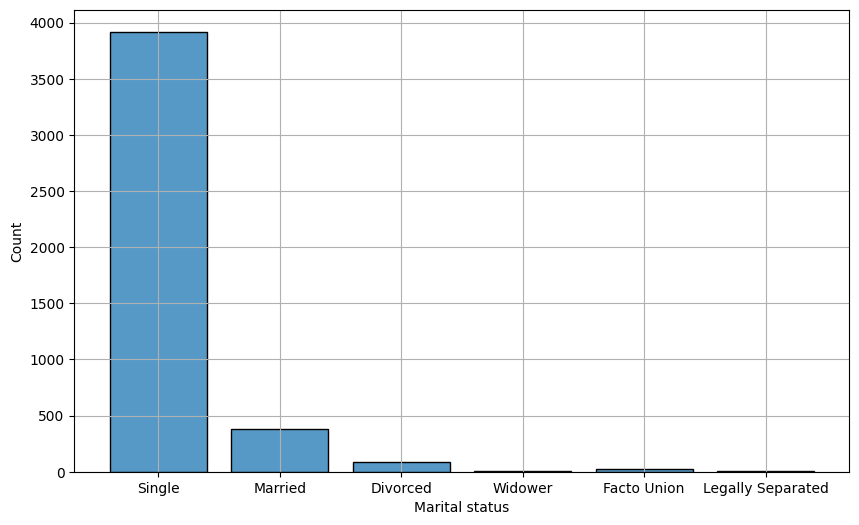

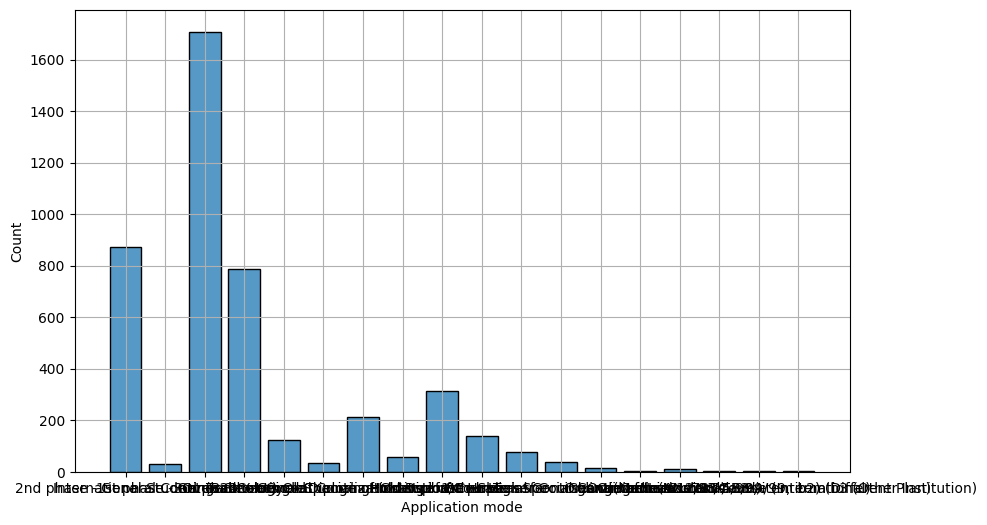

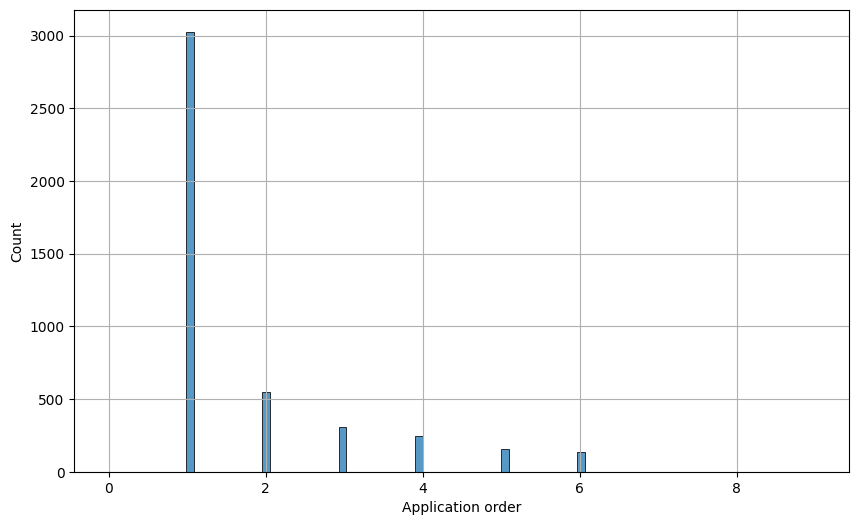

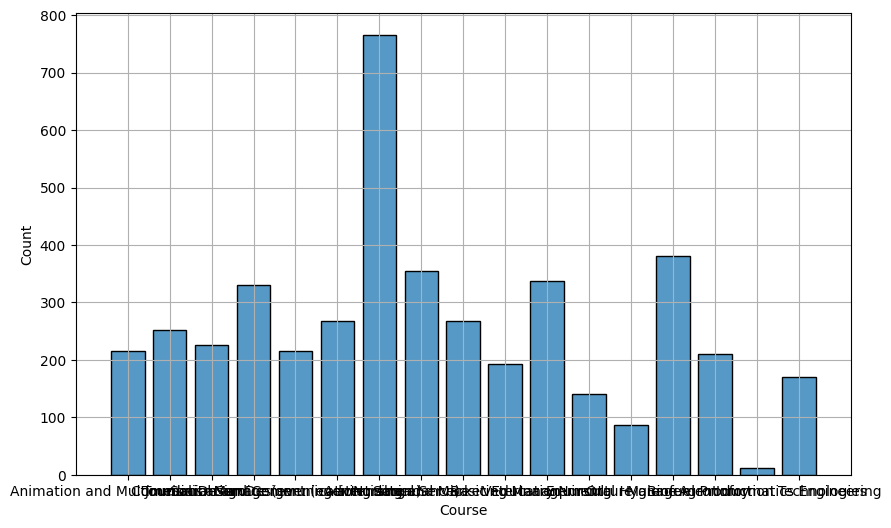

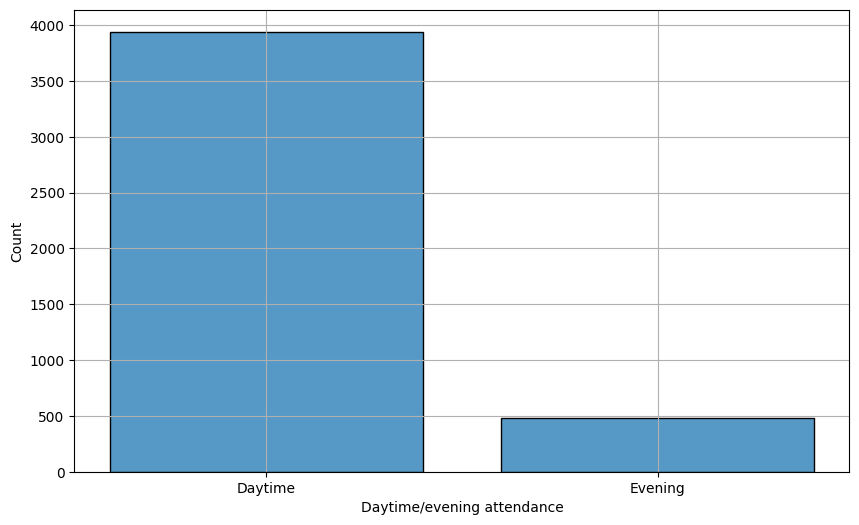

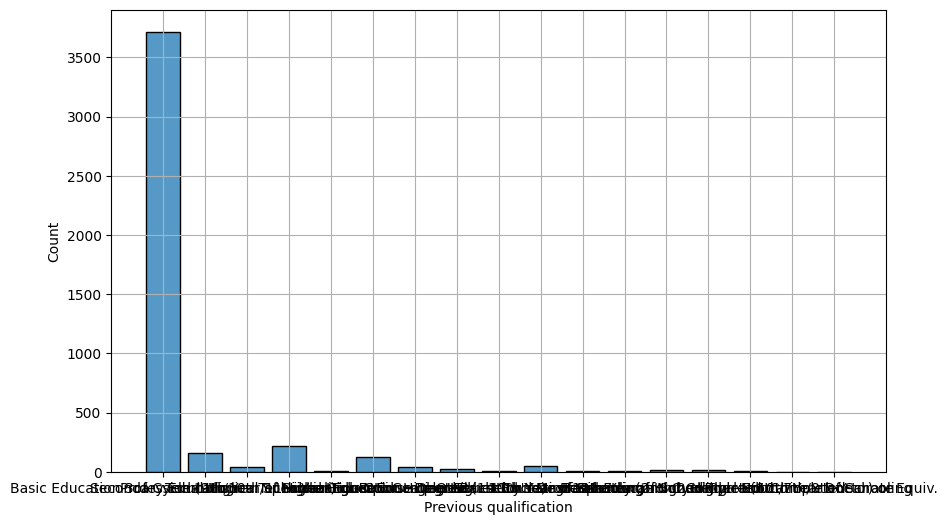

0.0000000000


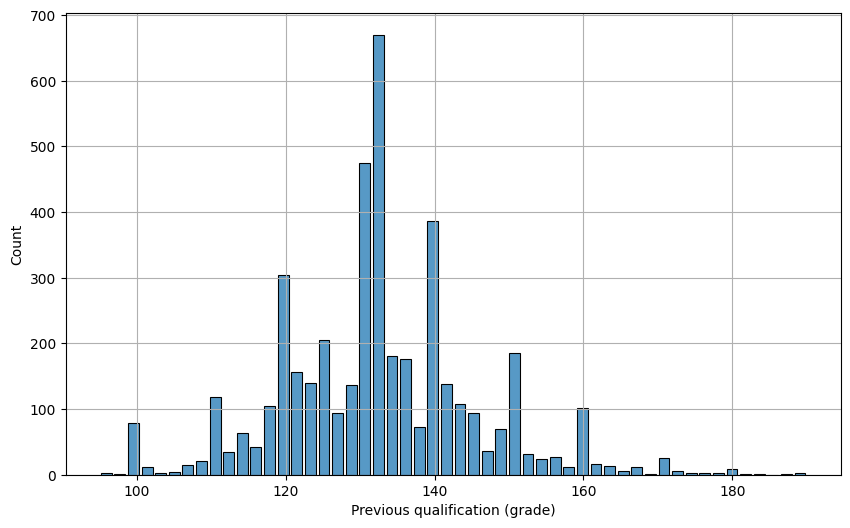

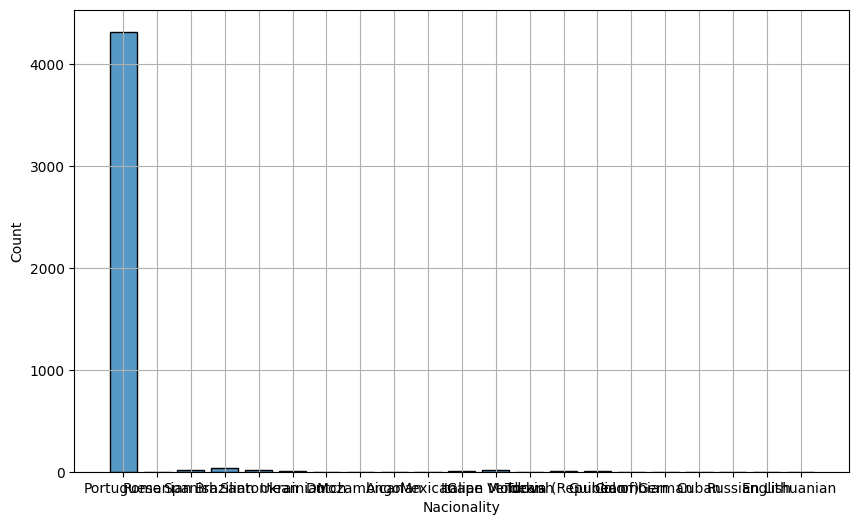

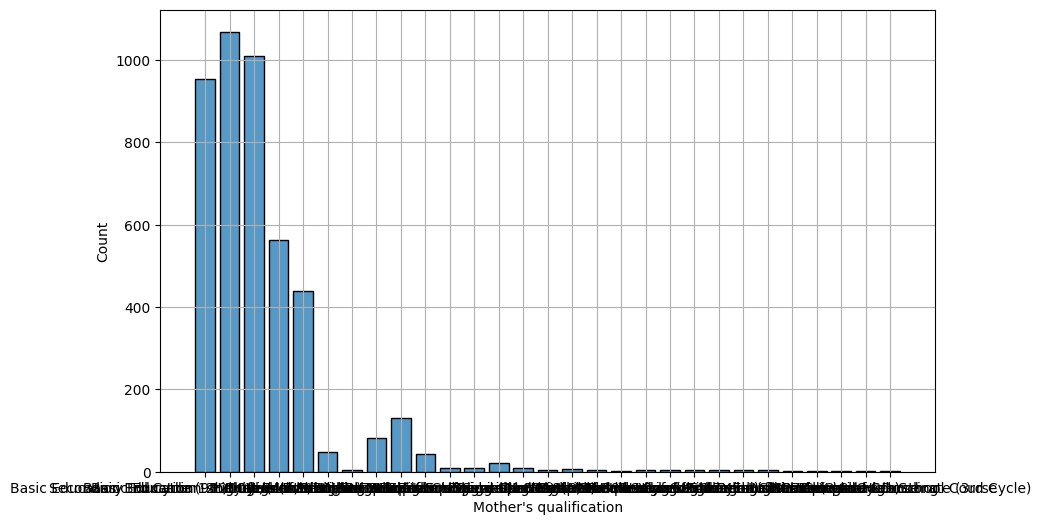

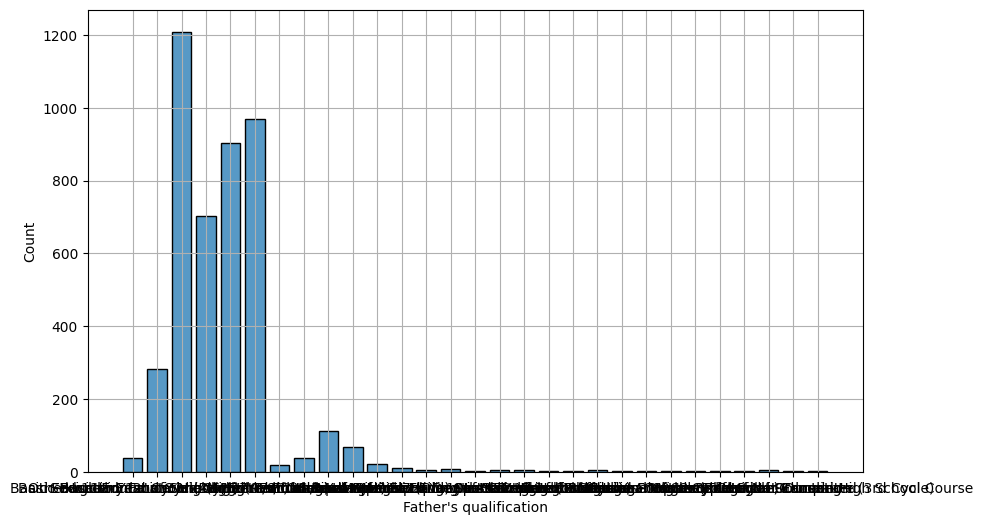

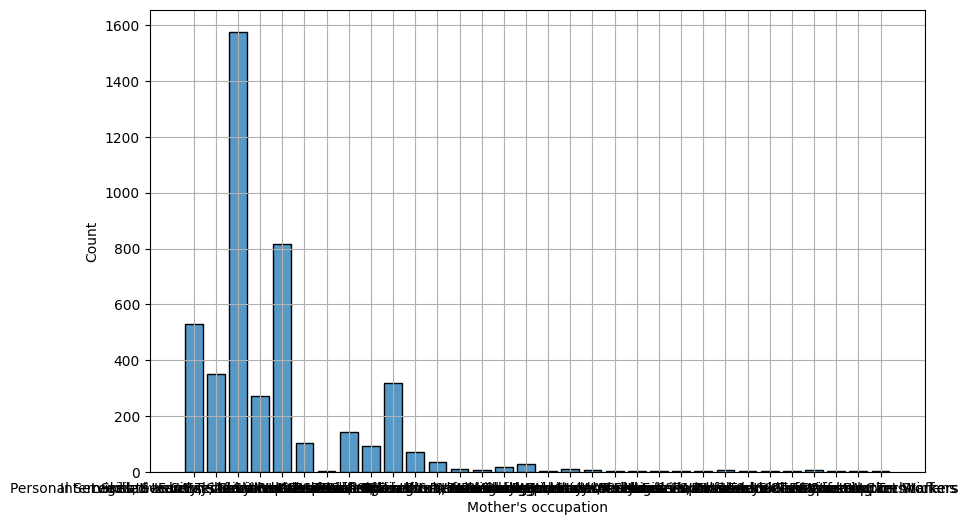

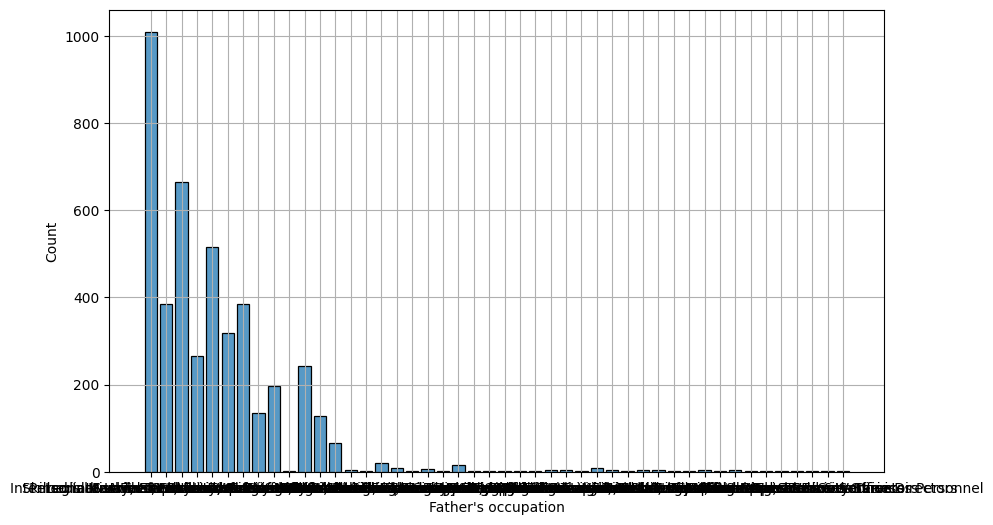

0.0000000000


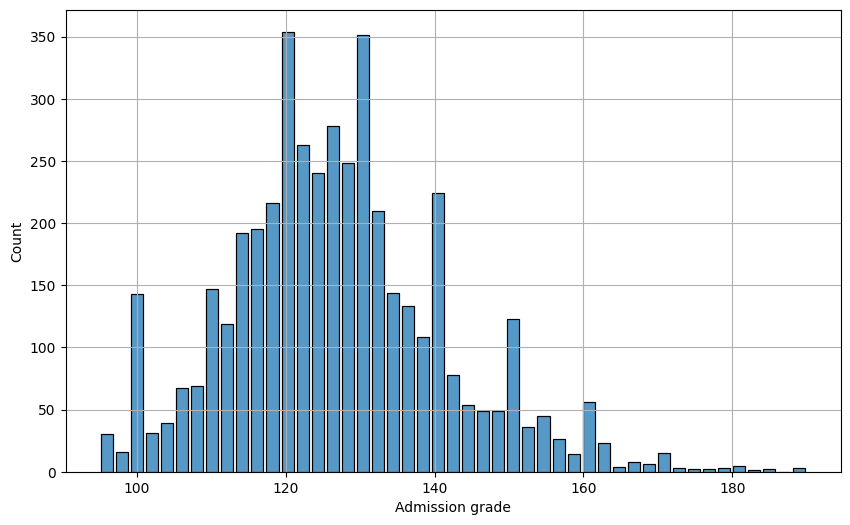

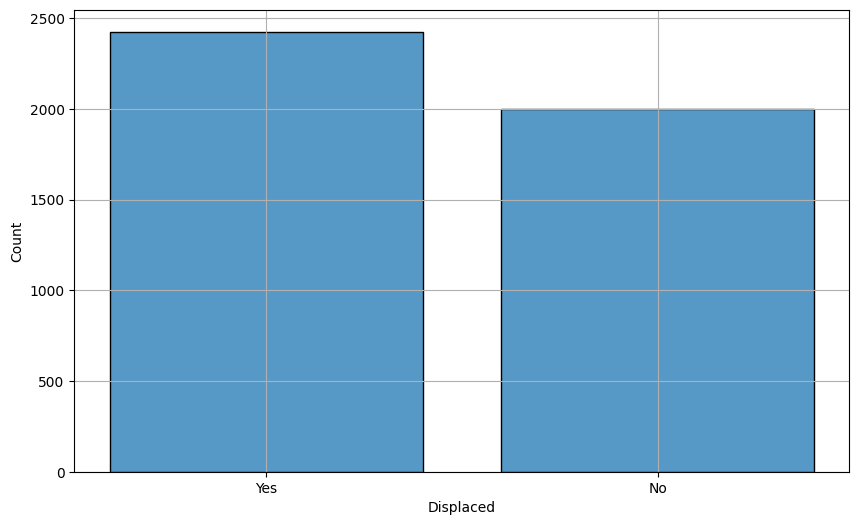

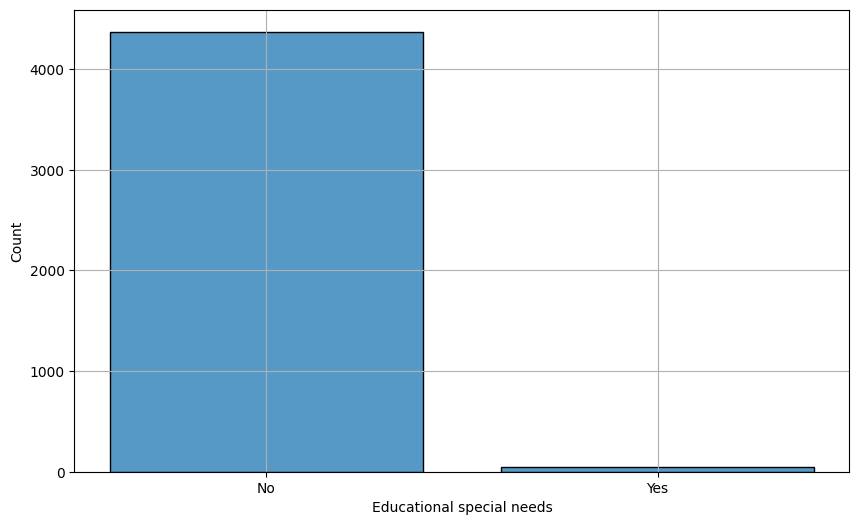

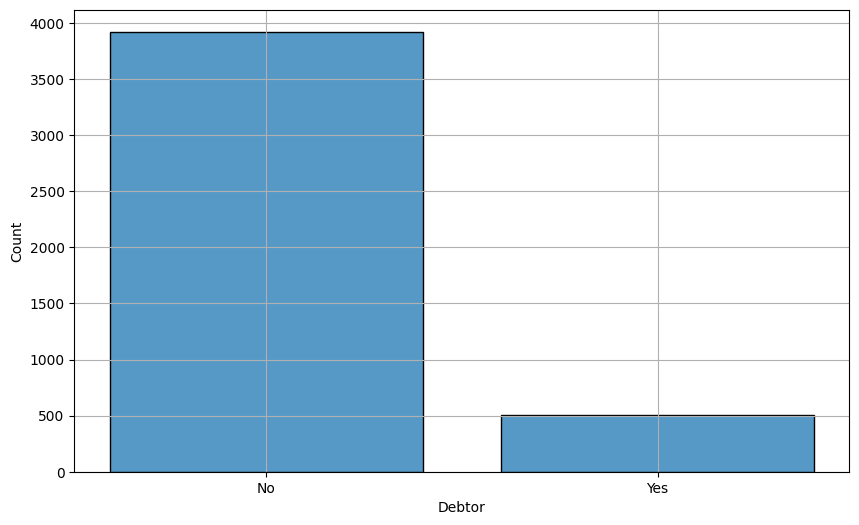

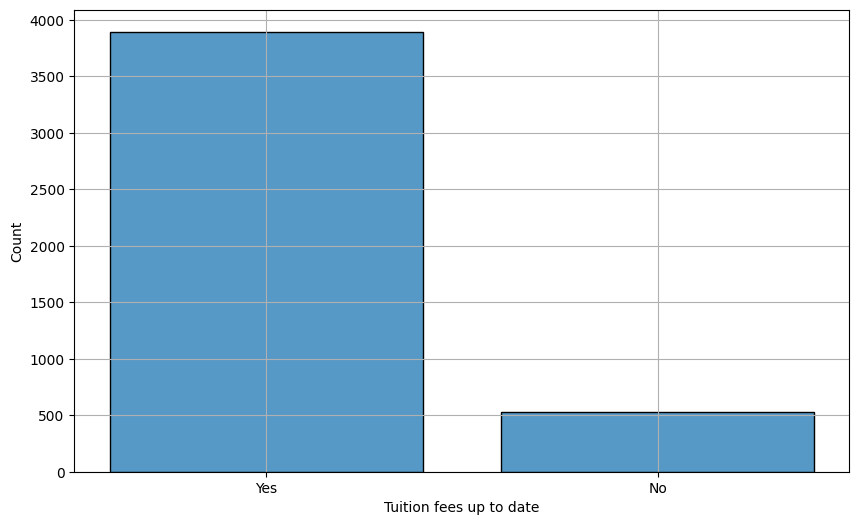

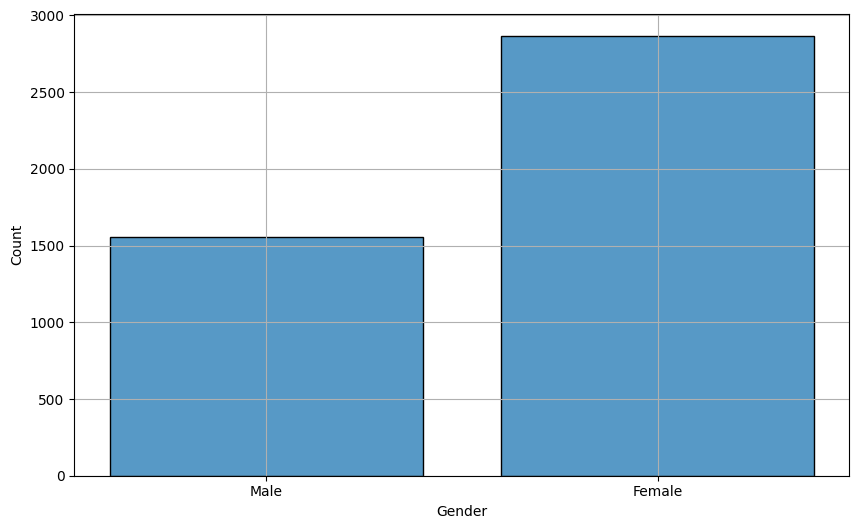

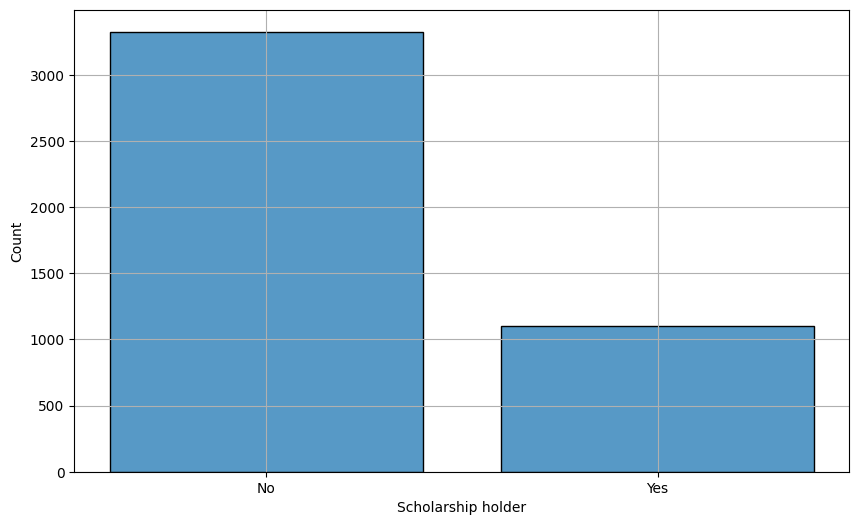

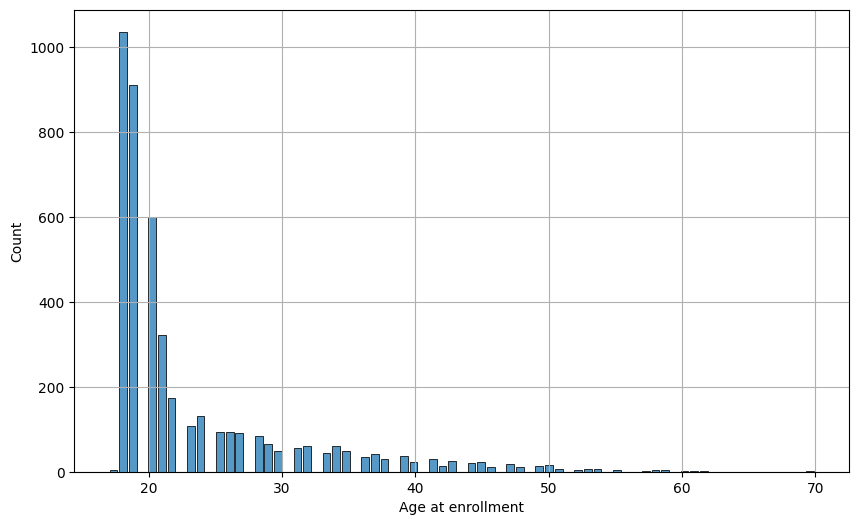

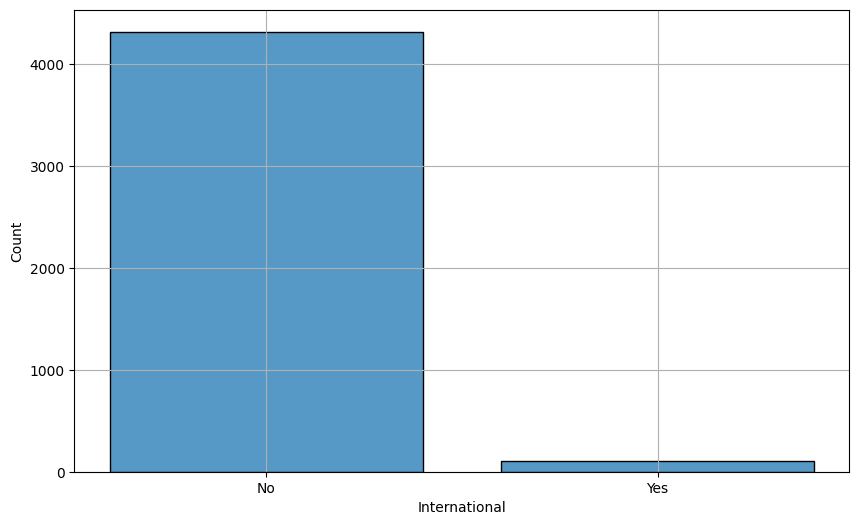

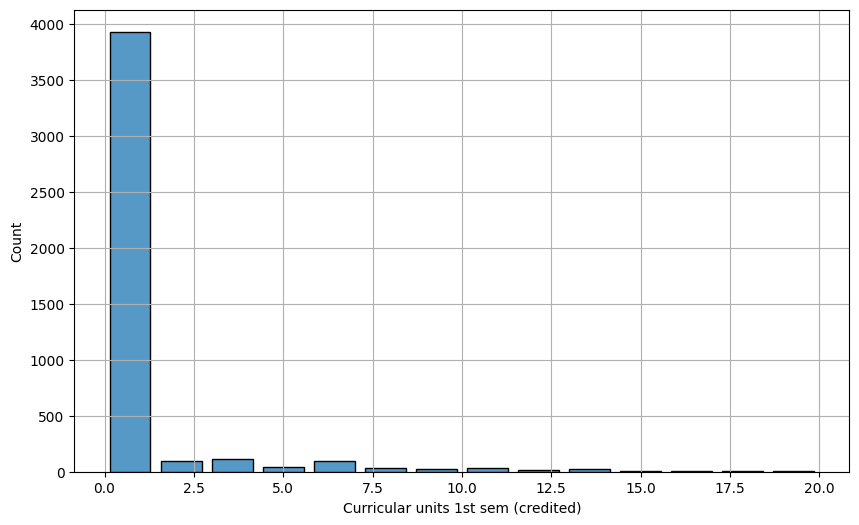

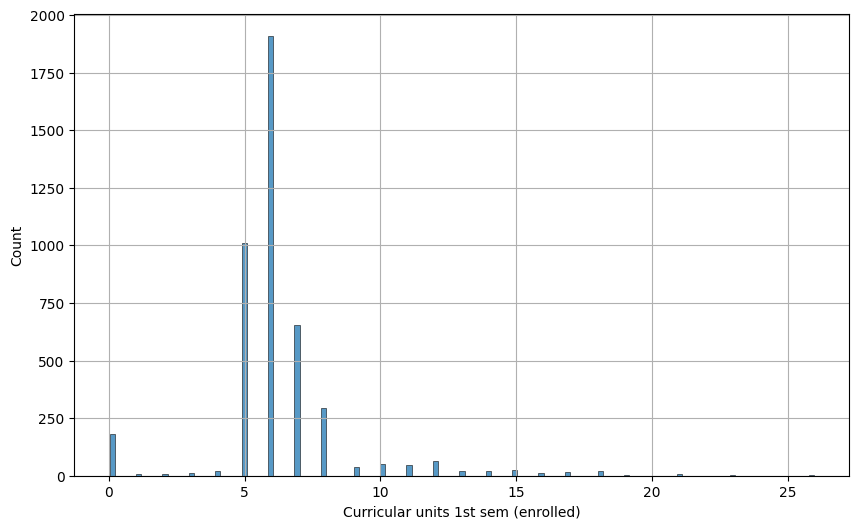

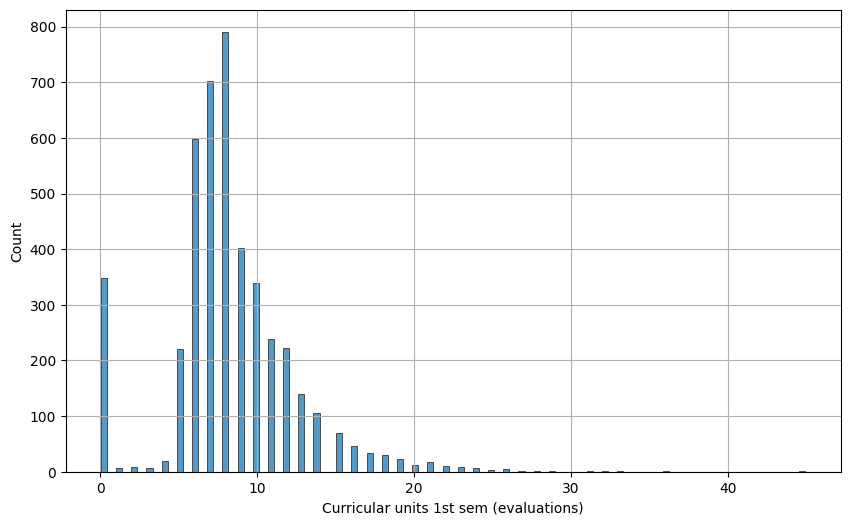

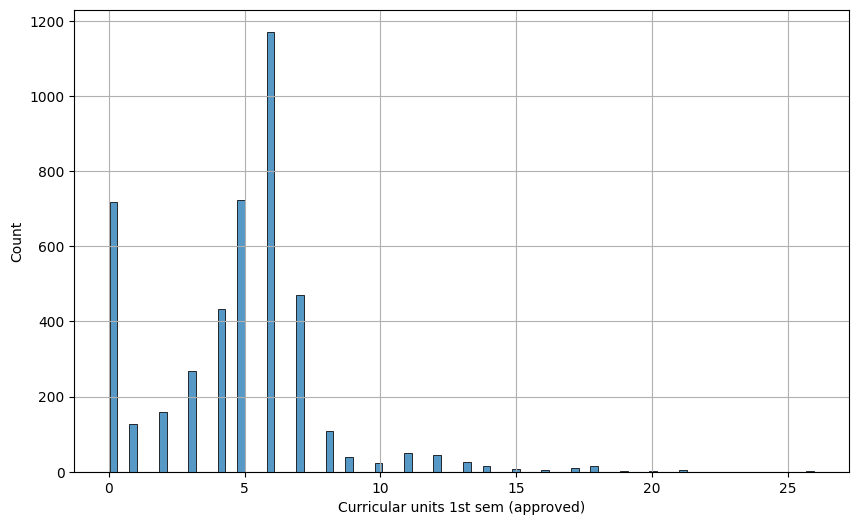

0.0000000000


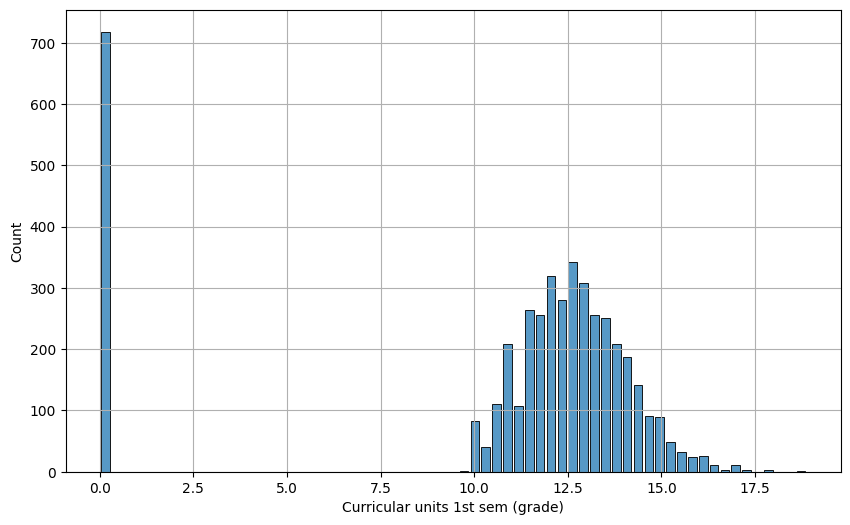

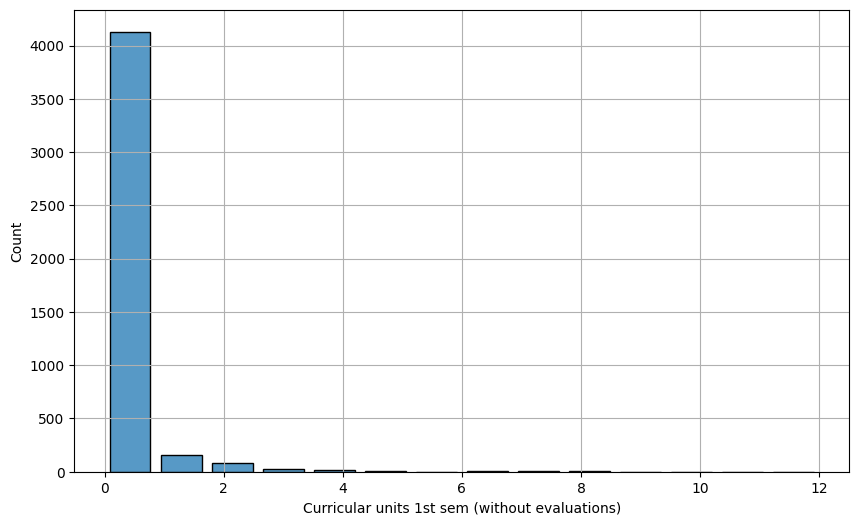

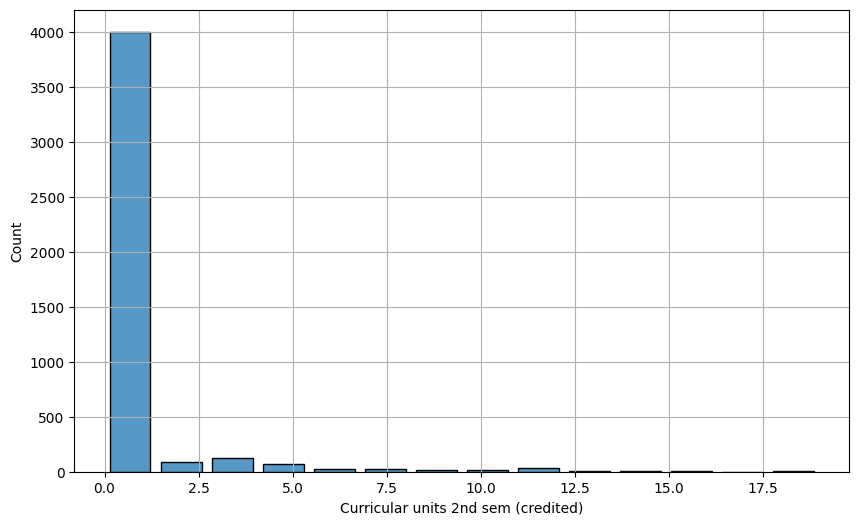

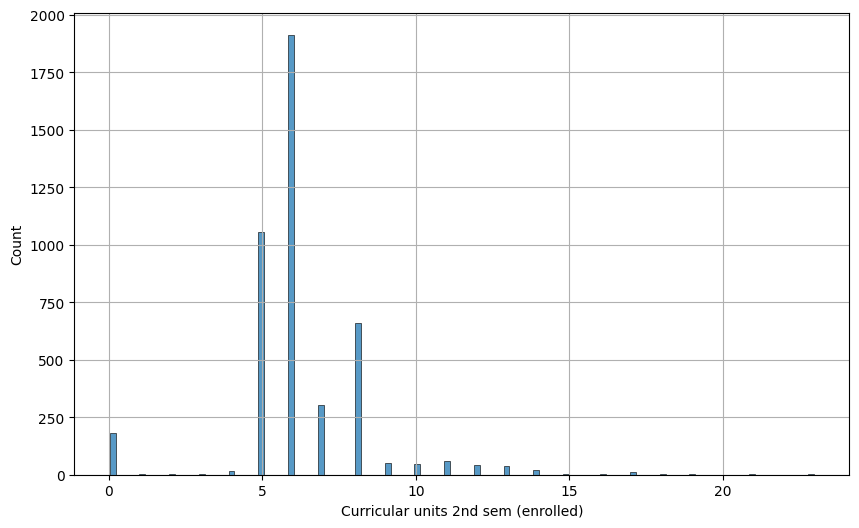

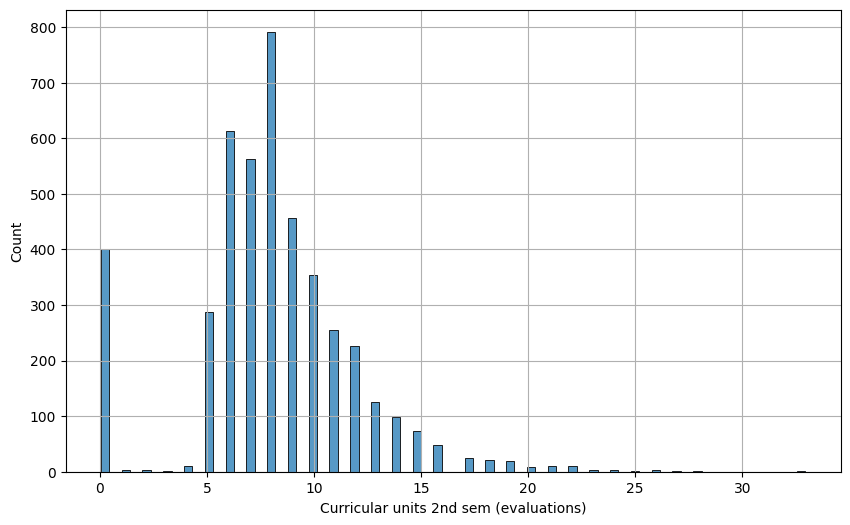

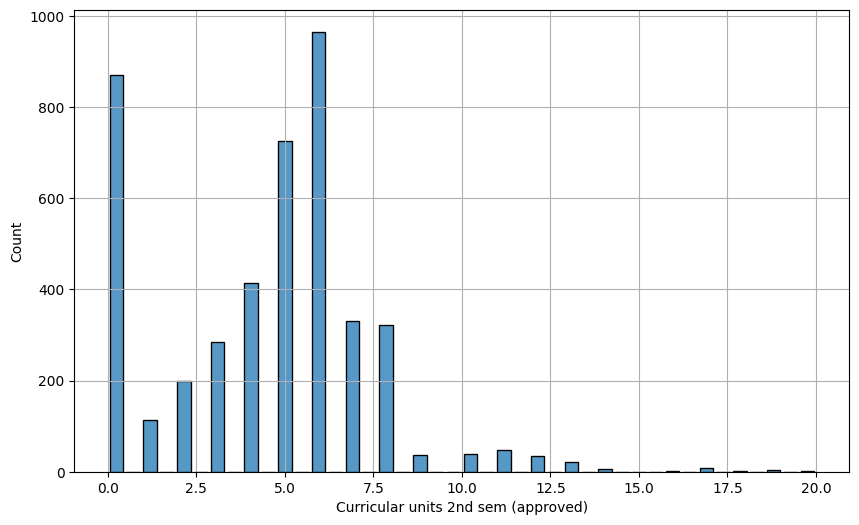

0.0000000000


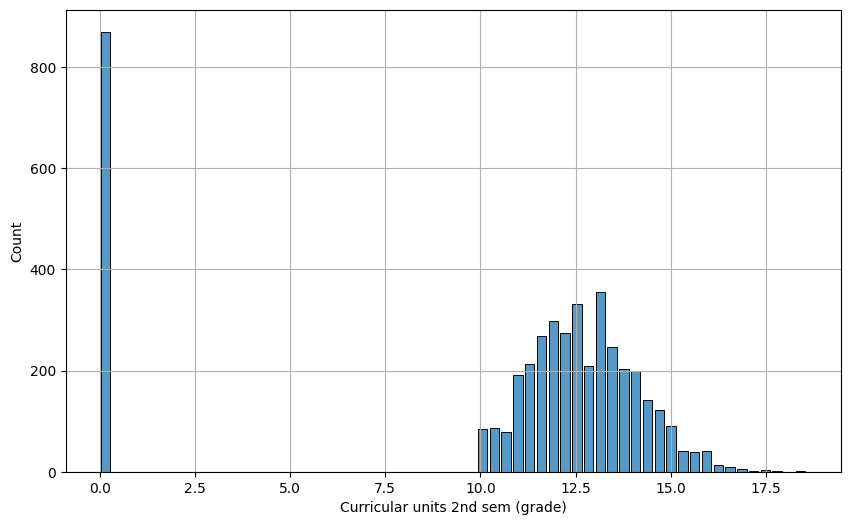

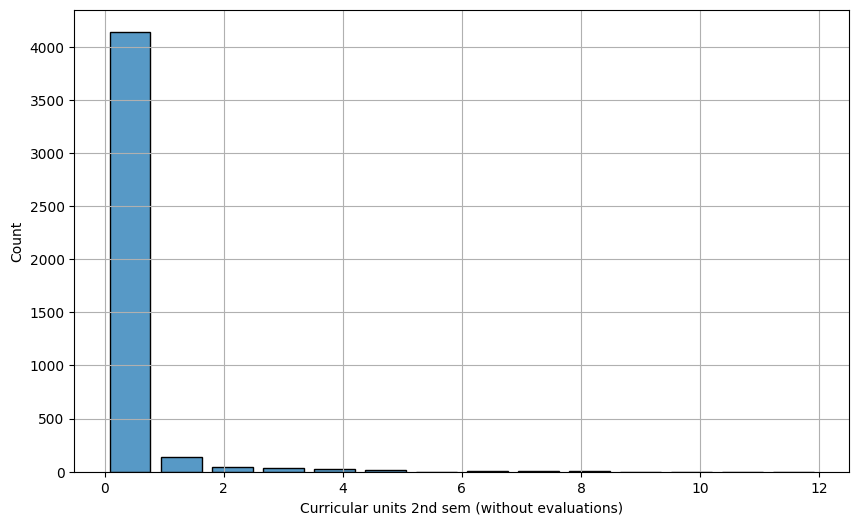

0.0000000000


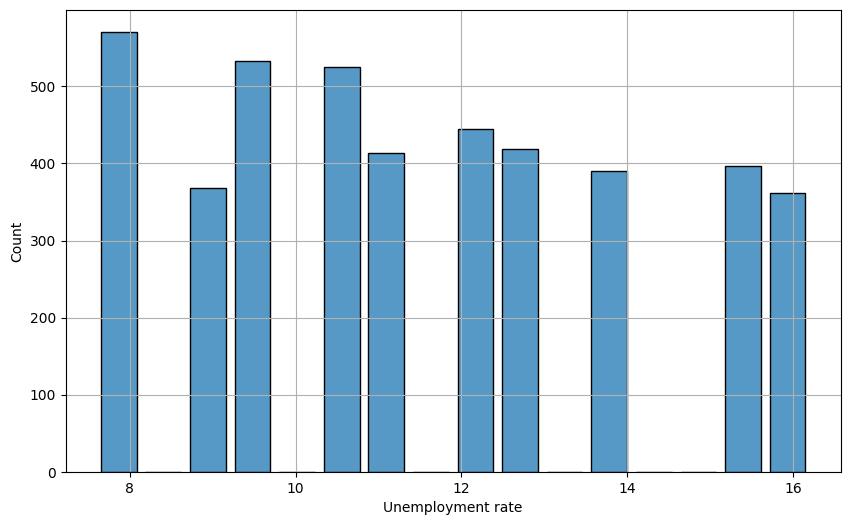

0.0000000000


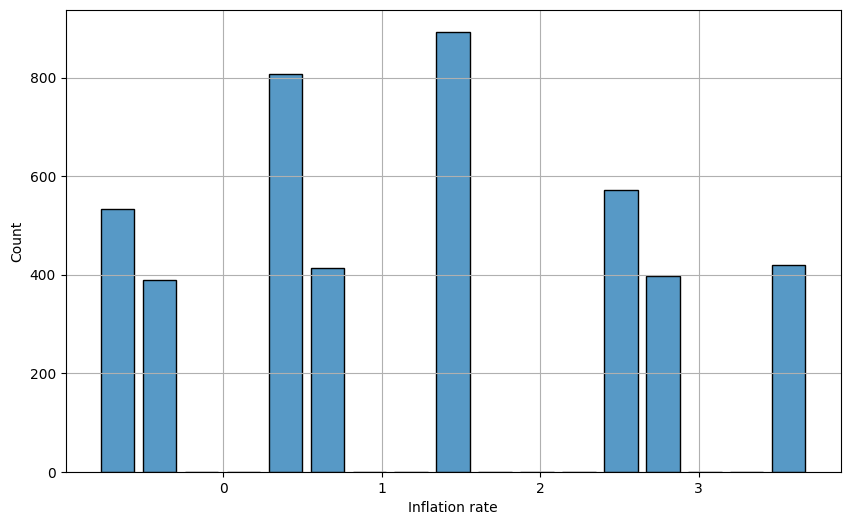

0.0000000000


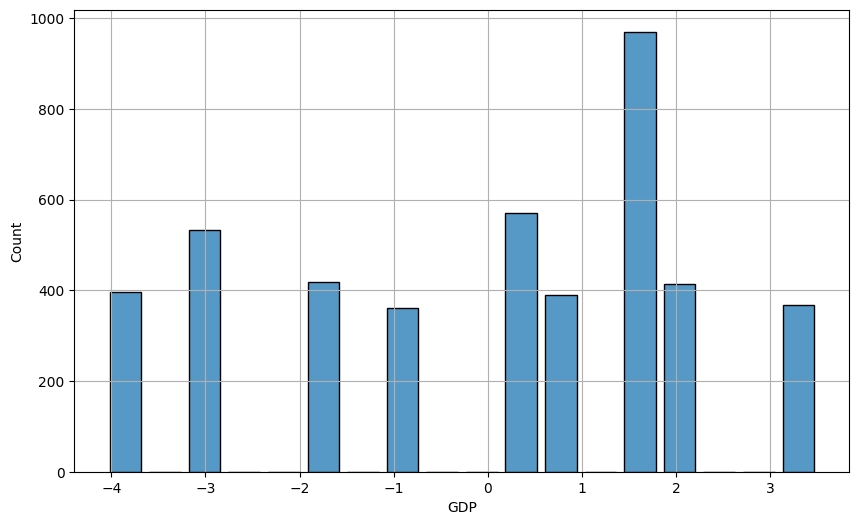

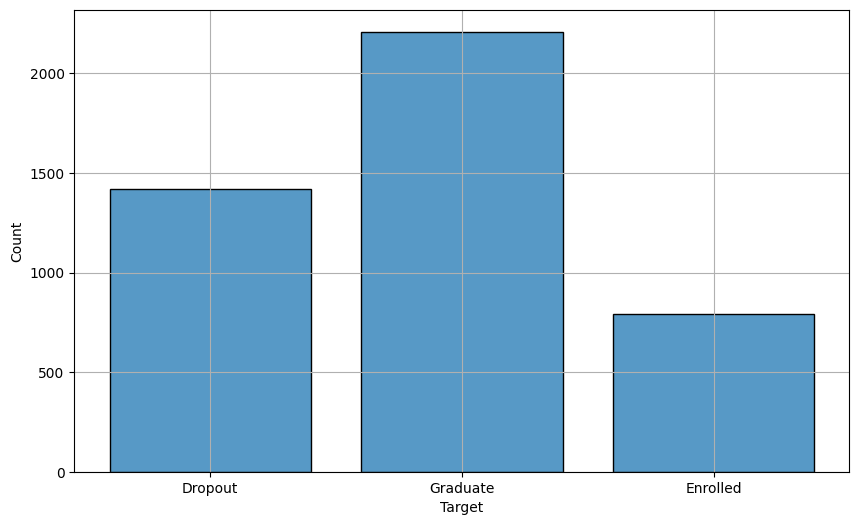

In [135]:
for i in df.columns:
    plt.figure(figsize=(10,6))
    plt.grid()
    # if len(df[i].unique())>2:
        # ax = sns.histplot(data=df,x=i,kde=False,hue=df["Target"],element="poly")
    # else:
    # ax = sns.histplot(data=df,x=i,kde=False,hue=df["Target"],multiple="dodge",shrink=.8)
    ax = sns.histplot(data=df,x=i,kde=False,multiple="dodge",shrink=.8)
    
    if df[i].dtype == "float64":
        s,p = shapiro(df[i])
        print(f"{p:.10f}")    
        x_max = ax.get_xlim()[1]  # Maximum x-value
        y_max = ax.get_ylim()[1]  # Maximum y-value
        # plt.text(x_max * 0.95, y_max * 0.95,  # Position (adjusted near the corner)
        #     f"{s} {p}", 
        #     fontsize=12, color='red',
        #     ha="right", va="top")  # Align text to top-right
    plt.show()

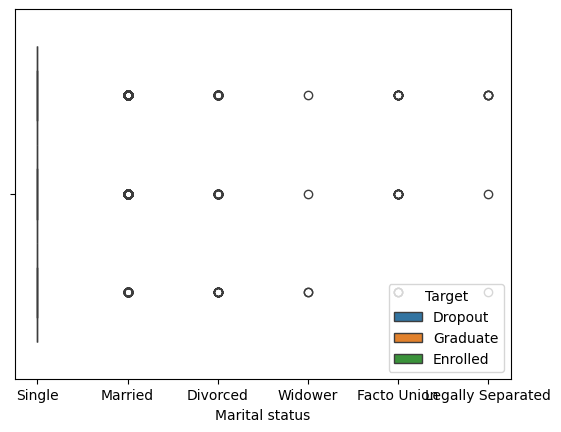

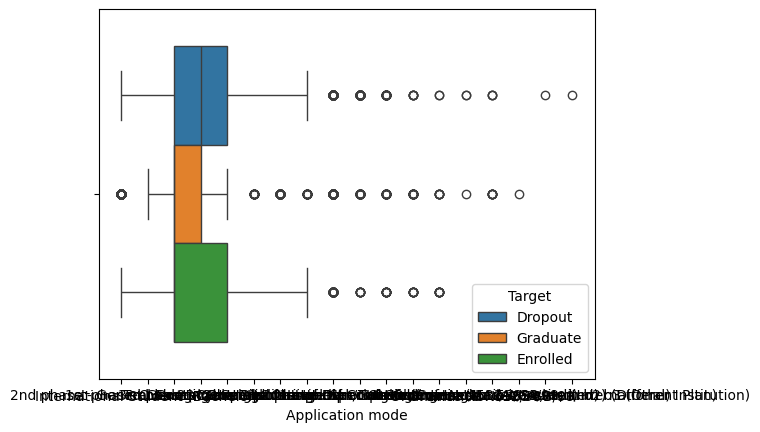

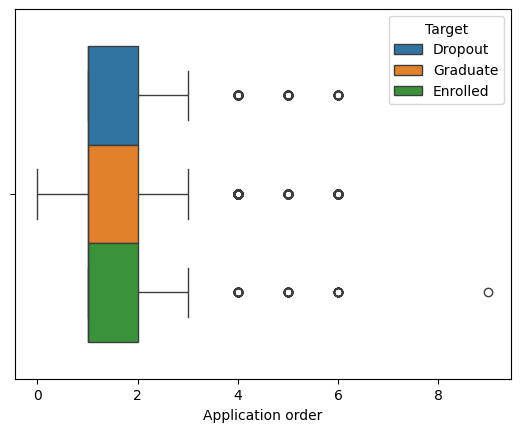

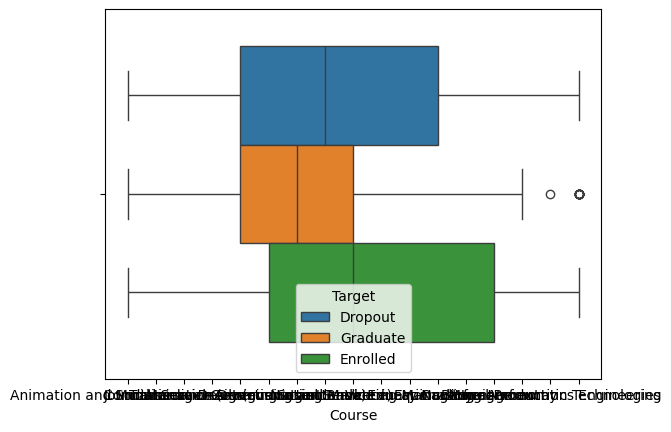

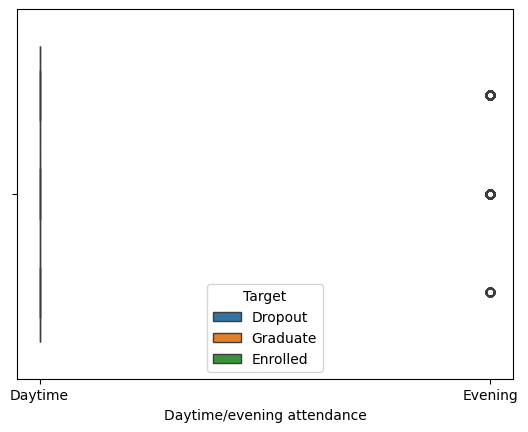

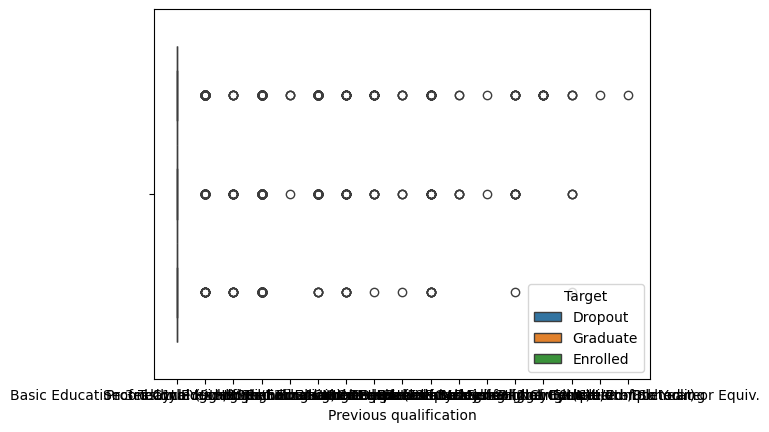

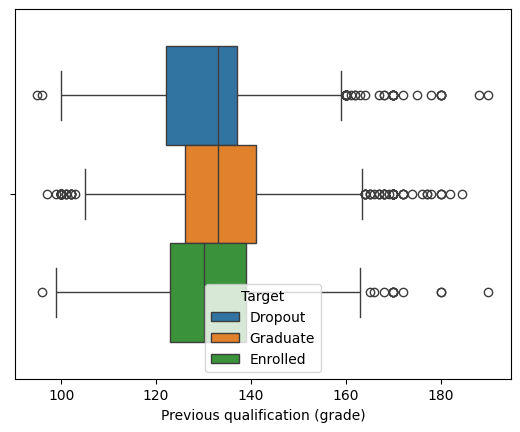

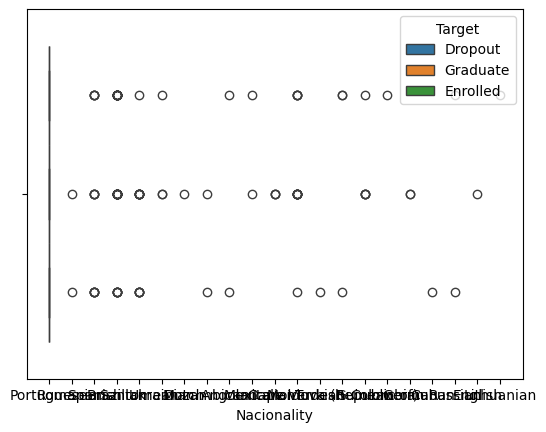

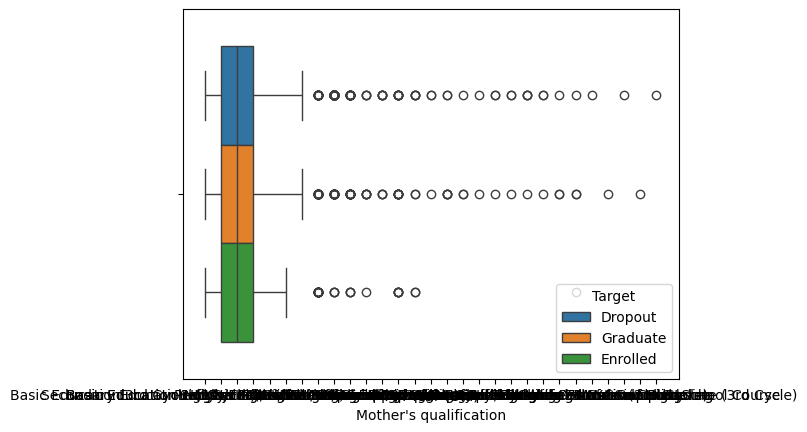

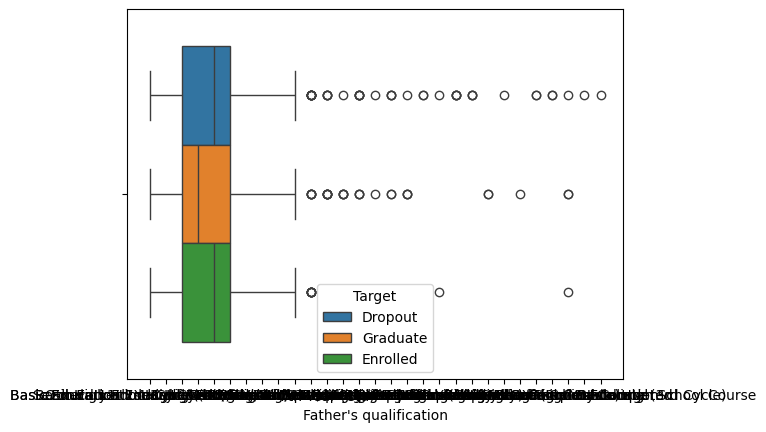

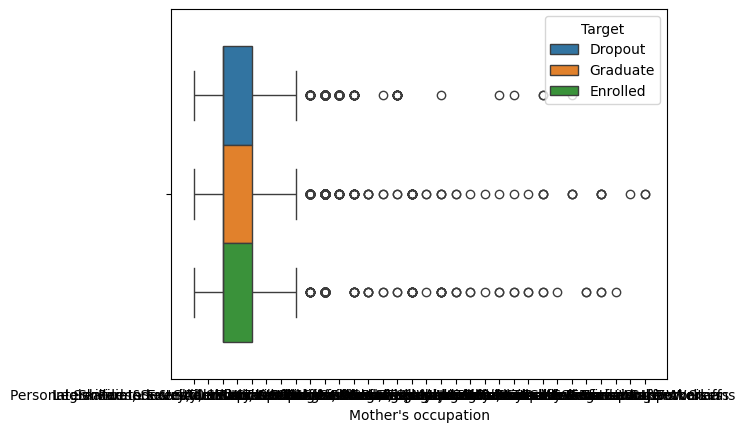

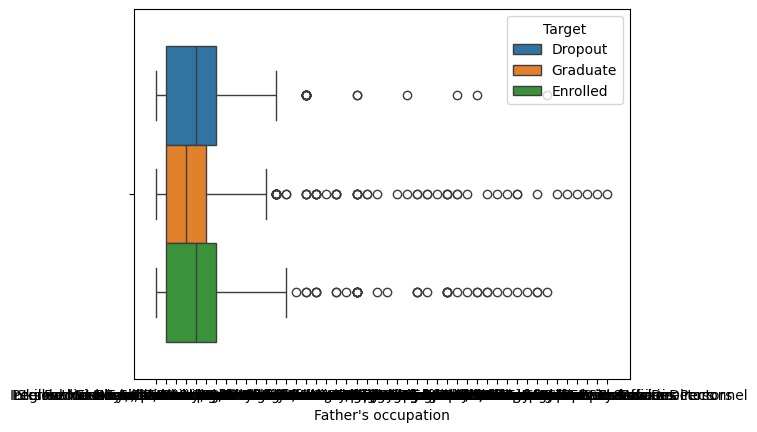

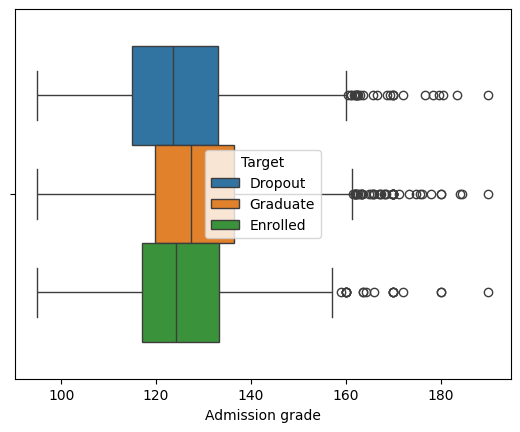

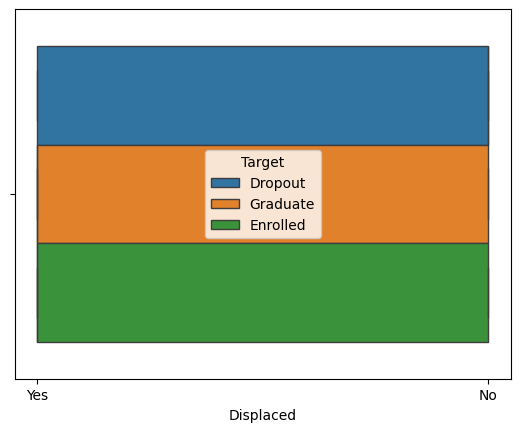

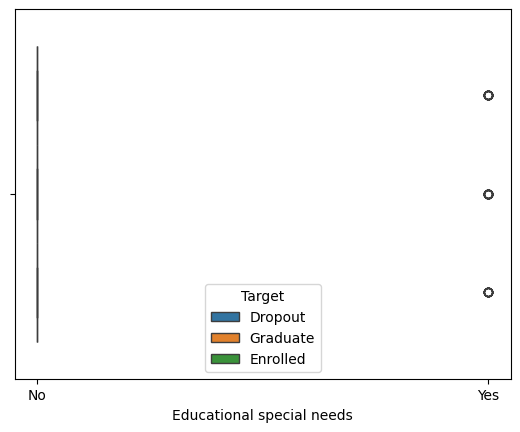

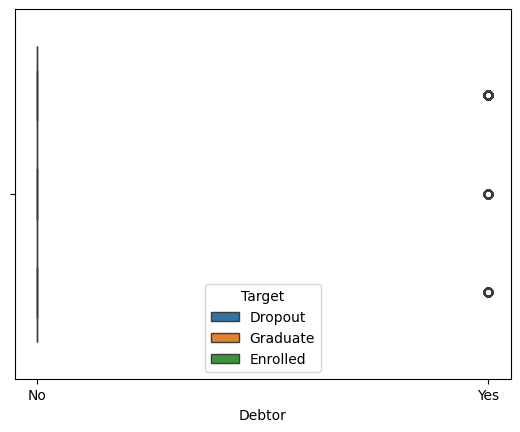

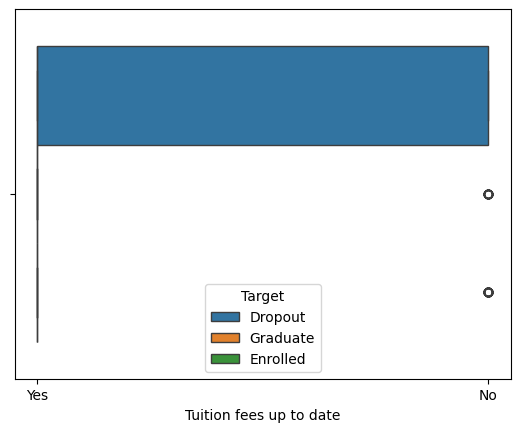

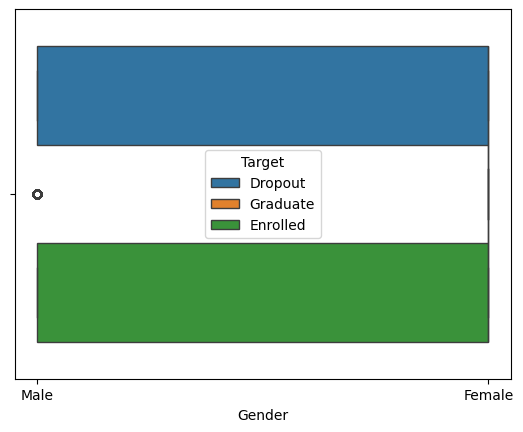

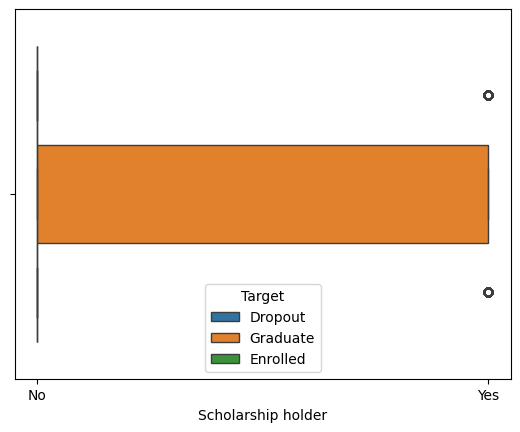

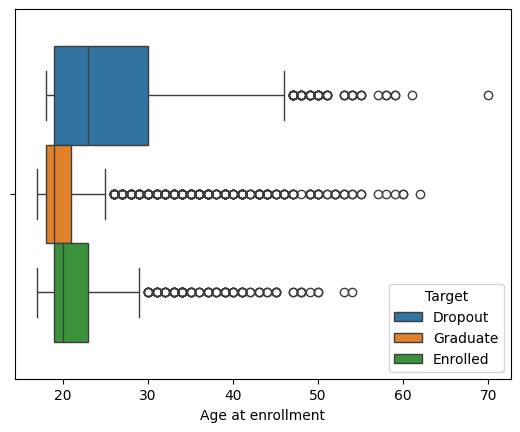

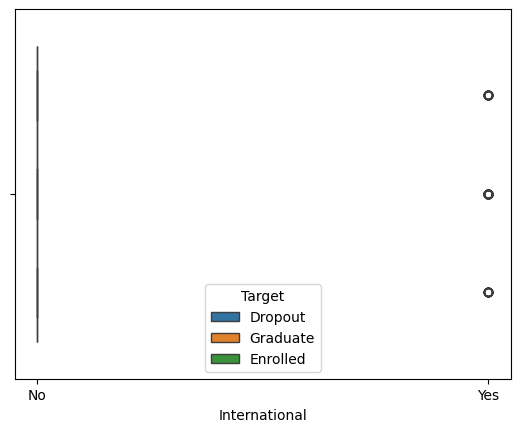

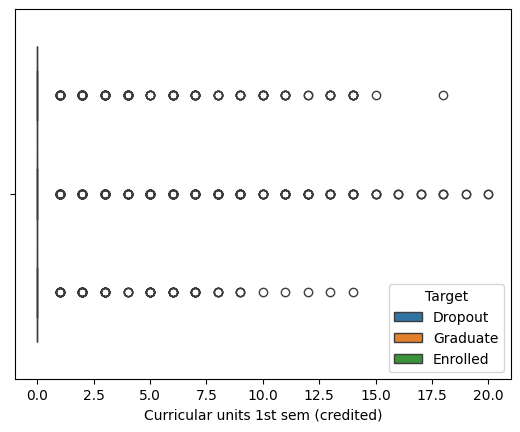

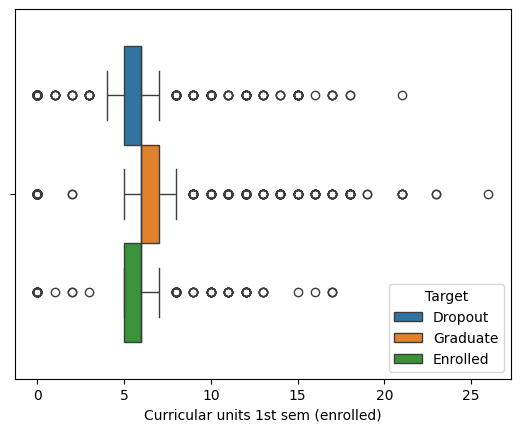

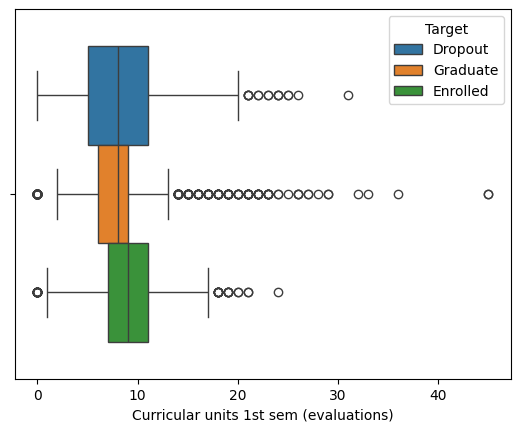

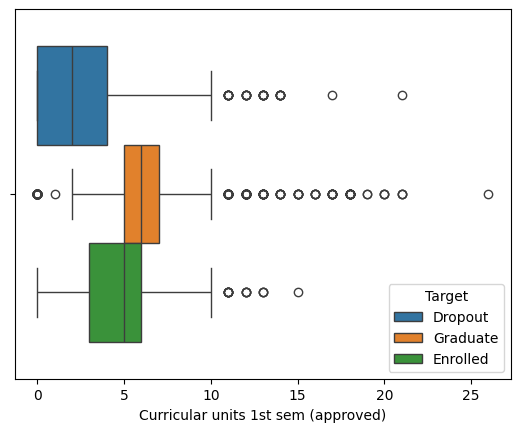

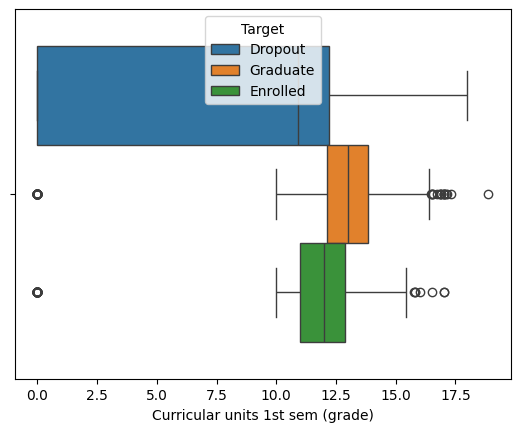

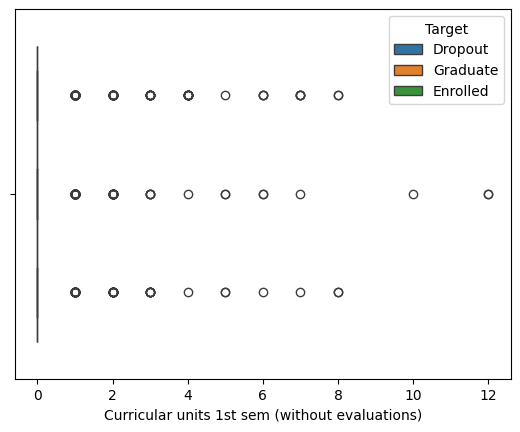

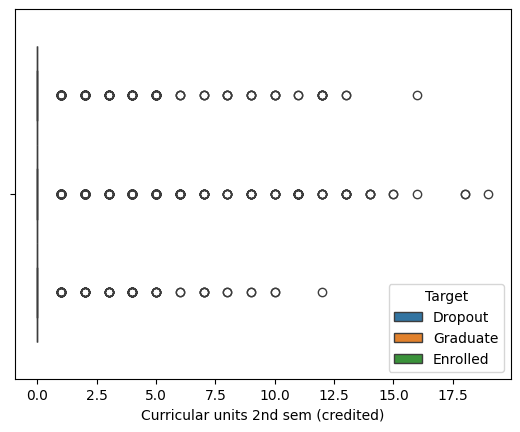

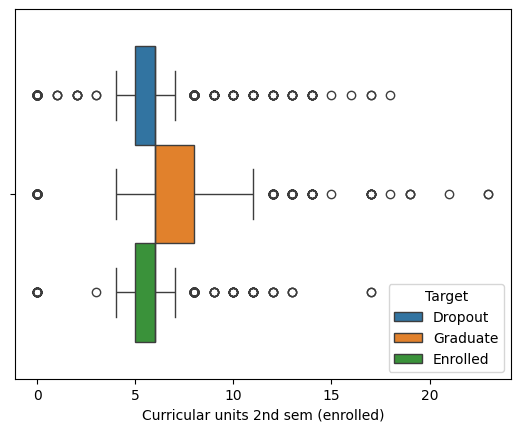

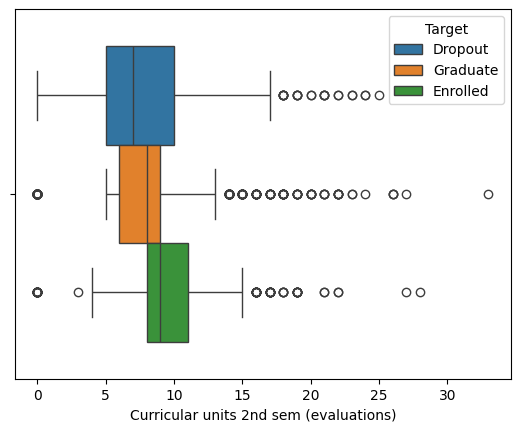

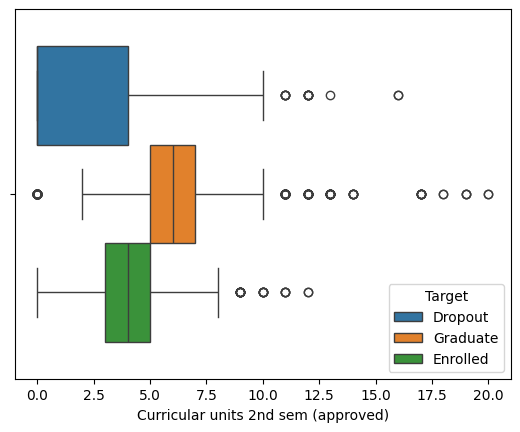

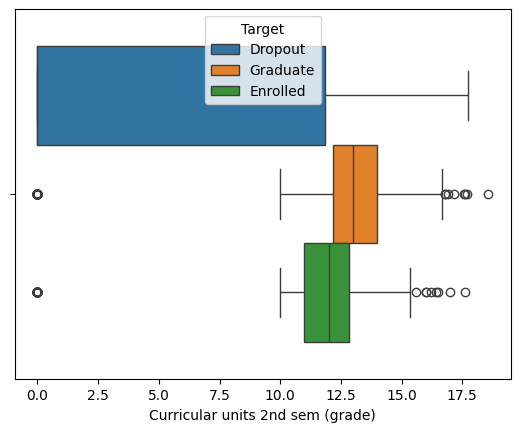

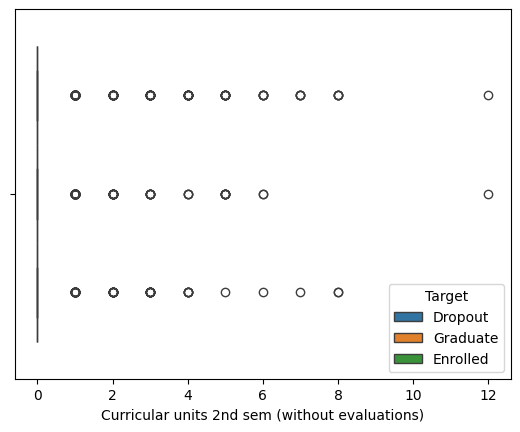

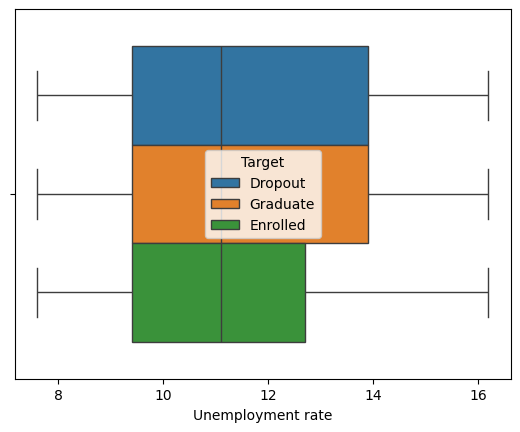

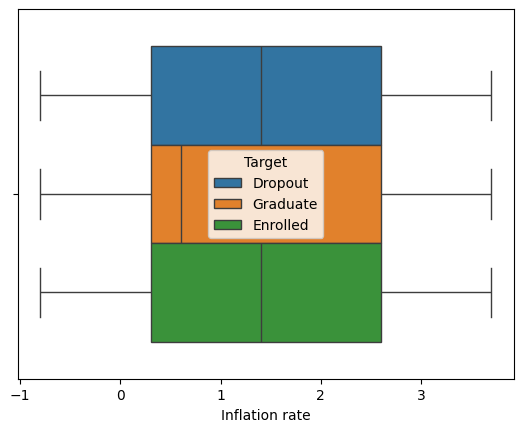

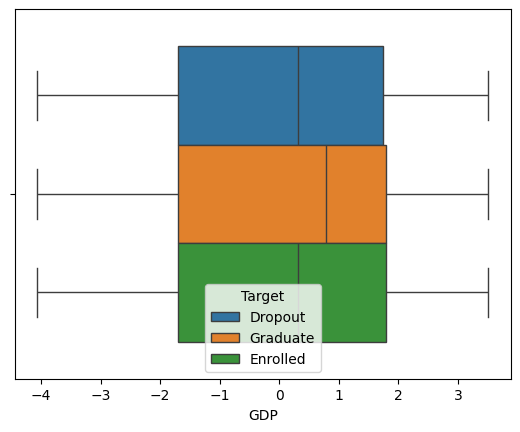

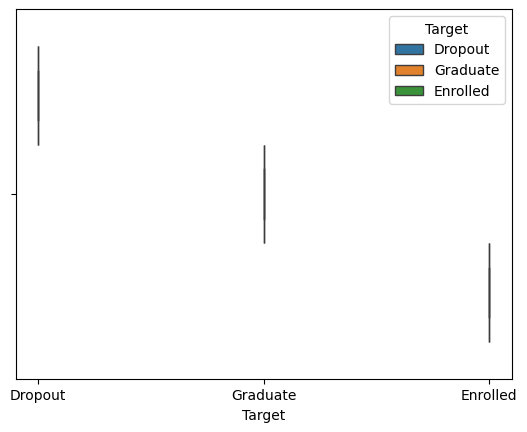

In [133]:
for i in df.columns:
    sns.boxplot(x=df[i],hue=df["Target"])
    plt.show()